# Lecture 16: Decision trees

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1P9IoqXN9dbjJ3TN50wa8wwDdvn9P6hX7)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2025-02-27 23:21:19


Considered conceptually as a *flow diagram* or tree of decisions based on inspecting properties of data-set.

- Can perform both classification and regression.
- A fundamental component of random forests (a powerful machine learning algorithm covered in the next lecture). 
- We will learn how to visualise and make predictions using Decision Trees.


## Conceptual example

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/DecisionTree.jpg" alt="data-layout" width="500" style="display:block; margin:auto"/>

[[Image source](https://inside-machinelearning.com/en/decision-tree-and-hyperparameters/)]

## Walk-through of decision tree

Let's consider an illustration using the Iris Data set (introduced in  Lecture 3).

### Images of different Iris species

#### Iris Setosa

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_setosa.jpg" width="300" style="display:block; margin:auto"/>

#### Iris Versicolor

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_versicolor.jpg" width="300" style="display:block; margin:auto"/>

#### Iris Virginica

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_virginica.jpg" width="300" style="display:block; margin:auto"/>

[[Image source](https://github.com/jakevdp/sklearn_tutorial)]


Load feature matrix, where each row correpsonds to an observed (*sampled*) flower, with a number of *features*, with corresponding target vector.

Consider two features only for now (petal length and width).

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
# We want to visualise the actual flow diagram of the tree, for this we can use graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file = './iris_tree.dot', 
                feature_names = iris.feature_names[ 2:], 
                class_names = iris.target_names, 
                rounded = True, 
                filled = True)

#creates a dot file :( so need to convert to something more sensible
! dot -Tpng ./iris_tree.dot -o ./iris_tree.png

To run dot locally you will need to install [graphviz](https://graphviz.org/).

You can install on Mac using Homebrew:
```bash
brew install graphviz
```

You can install on Ubuntu using apt:
```bash
sudo apt install graphviz
```

Installation instructions for other systems are available [here](https://graphviz.org/download/).

### Decision tree for Iris classification (depth 2)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree.png" alt="data-layout" width="500" style="display:block; margin:auto"/>

Tree consists of a number of nodes.
- Top node is the _root node_.
- Intermediate _split nodes_.
- Lower nodes are _leaf nodes_.

Decisions based on *features* and *thresholds*.

Navigate tree to make predictions.

### Interpreting node outputs

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_1node.png" alt="data-layout" width="300" style="display:block; margin:auto"/>

Arguments in the nodes are: 
- Top argument shows the _threshold_ upon which the classification division was made.
- ```gini``` (see next slides) is a quantitative measure of impurity.
- ```samples``` denotes the number of training instances that satisfy the criteria.
- ```values``` denotes the number of training instances per class that satisfy the criteria.
- ```class``` prediction for the node.

### Decision boundaries

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/decision_tree_decision_boundaries_plot.png" alt="data-layout" width="600" style="display:block; margin:auto"/>

We set ```max_depth=2```, so algorithm stopped after two divisions. 

### Estimating class probabilities

Also want to know the _probability_ that an instance $i$ belongs to class $k$. 

Class probability founds by finding the leaf node for instance $i$, then returns ratio of training instances of class $k$ in this node.


#### Example 
For case where flower has petals=5cm long and 1.5cm wide
corresponding leaf node is at depth-2 left node. 

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/decision_tree_decision_boundaries_plot.png" alt="data-layout" width="600" style="display:block; margin:auto"/>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_1node2.png" alt="data-layout" width="300" style="display:block; margin:auto"/>


So probabilities are: 0% (Setosa), 49/54=90.7% (Versicolor), 5/54=9.3% (Virginica).

In [4]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

## Quality measures

### Gini impurity

Gini impurity is defined by
$$
G_i=1-\sum_{k=1}^{n}p^2_{i,k} ,
$$
where $p_{i,k}$ is the ratio of class $k$ instances among training instances in the $i^{\rm th}$ node. 

$G_i=0$ means the sample is 100% _pure_ i.e. all instances are in a single class. 

#### Gini example calculation

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_1node2.png" alt="data-layout" width="300" style="display:block; margin:auto"/>

$$
G_i = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2=  0.168
$$

### Entropy 

Alternative to Gini is to use entropy as the purity measure 
$$
H_i=-\sum_{k=1}^n p_{i,k}\log_2(p_{i,k}),
$$
for $p_{i,k}\not=0$. 

Measures the information content of variable (number of bits required to encode).

#### Entropy example calculation

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_1node2.png" alt="data-layout" width="300" style="display:block; margin:auto"/>

$$
H_i =  - (49/54) \log_2(49/54) - (5/54) \log_2(5/54)=  0.445
$$

### Does it make a difference what quality measure is used? 

Not usually, although Gini tends to isolate the most frequent classes, and entropy leads to more "balanced" trees.  Entropy is slightly more expensive to compute.

### Decision tree using entropy criterion

In [5]:
# Redo the first example but use entropy instead
tree_clf = DecisionTreeClassifier(max_depth = 2,criterion='entropy') #making a decision tree of depth 2 from the data 
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [6]:
export_graphviz(tree_clf, 
                out_file = './iris_tree_entropy.dot', 
                feature_names = iris.feature_names[ 2:], 
                class_names = iris.target_names, 
                rounded = True, 
                filled = True)
! dot -Tpng ./iris_tree_entropy.dot -o ./iris_tree_entropy.png

#### Entropy tree

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_entropy.png" alt="data-layout" width="500" style="display:block; margin:auto"/>

#### Gini tree (for reference)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree.png" alt="data-layout" width="500" style="display:block; margin:auto"/>

## CART training algorithm

Classification And Regression Tree (CART) algorihtm can be used to train decision trees -- also called *growing trees* algorithm (used by SciKit Learn).

- Splits the sample into two subsets using a single feature $k$ at threshold $t_k$
- Chooses feature $k$ and threshold $t_k$ by finding pair that produces purest subset, weighted by their size.

Cost function minimized for each split:

$$
J(k,t_k)=\frac{m_\text{left}}{m}G_\text{left}+\frac{m_\text{right}}{m}G_\text{right} ,
$$

where $G_\text{left/right}$ measures the impurity of the left/right subset and $m_\text{left/right}$ is the number of instances in the left/right subset.

Note that the CART algorithm:
- Only splits data in two at each stage, i.e. is binary.
- Is a greedy algorithm.  It searches for the optimal split at each level, then repeats for subsequent levels.  There is no guarantee that the overall optimal tree is found.  Nevertheless, usually produces a tree that is reasonably good.

## Regularisation and hyperparameters

Decision Trees are **non-parametric** classification algorithms since the number of parameters is not determined prior to training.

Tends to overfit if not careful. 

Need to regularise the problem. This can be done by the restricting the complexity of the tree, for example though the following SciKit Learn parameters.

- `max_depth`: maximum depth of the tree.
- `max_features` maximum number of features used in splitting at each node.
- `max_leaf_nodes` maximum number of leaf nodes.
- `min_samples_split`: mimimum number of samples a node must have before it can be split.
- `min_samples_leaf`: minimum number a leaf can have to be created.
- `min_weight_fraction`: Same as `min_samples_leaf` but expressed as a fraction of total samples.

Generally, increasing ```min_*``` hyperparameters or reducing ```max_*``` hyperparameters will regularise the model.

Other algorithms _prune_, i.e. make a (relatively) unrestricted tree then remove statistically insignificant nodes.

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*

## Decision trees for regression 

Decision trees can also be used for regression tasks.

### Train regression model

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

### Visualise tree

In [8]:
export_graphviz(
    tree_reg,
    out_file="./regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

#creates a dot file :( so need to convert to something more sensible
! dot -Tpng ./regression_tree.dot -o ./regression_tree.png

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/regression_tree.png" alt="data-layout" width="700" style="display:block; margin:auto"/>

### Train a deeper model

In [9]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

### Plot models

Text(0.5, 1.0, 'max_depth=3')

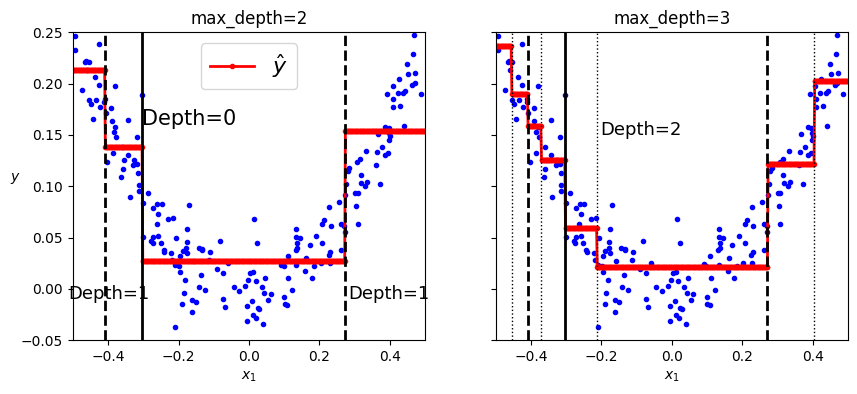

In [10]:
import matplotlib.pyplot as plt

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

### Training regression models

CART algorithm works in the same way except the cost function is based on the mean squared error (MSE):

$$
J(k,t_k)=\frac{m_\text{left}}{m}\text{MSE}_\text{left}+\frac{m_\text{right}}{m}\text{MSE}_\text{right}.
$$

**Exercises:** *You can now complete Exercise 2 in the exercises associated with this lecture.*

## Limitations

### Sensitivity to axis orientation

Decision trees are sensitive to the axis orientation.

Consider same data but with axis rotated by 45${}^\circ$.

In [11]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

Text(0, 0.5, '')

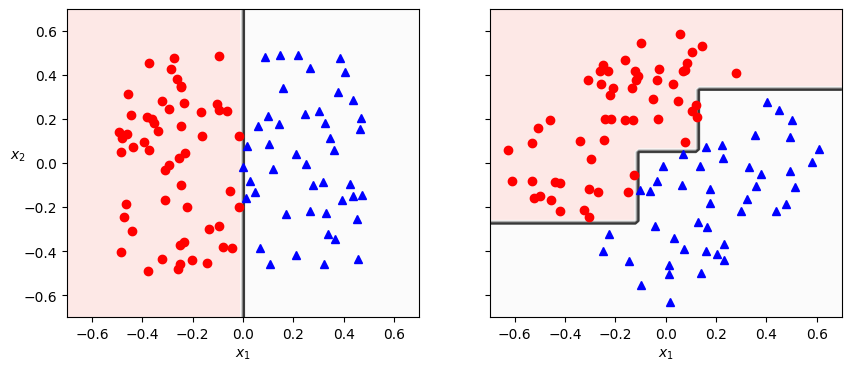

In [12]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

Could mitigate with principle component analysis (PCA) or with ensemble methods (see upoming lectures).

### Decision trees are not highly stable

- Small changes to hyperparameters or to data may produce very different models.
- Even retraining with a different random seed can produce very different models.

Can leverage this property by averaging over many trees, which gives rises to *ensemble methods* (as discussed in the next lecture).

**Exercises:** *You can now complete Exercises 1-2 in the exercises associated with this lecture.*